In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("credit_score.csv")

In [3]:
data_df.head(6)

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
5,C04Q46QKOG,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,...,0.3571,0.0714,No,1,0,0,1,0,596,0


In [26]:
print("\nMissing values:\n", data_df.isnull().sum())


Missing values:
 CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64


In [32]:
data_df.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [27]:
numeric_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric summary:\n", data_df[numeric_cols].describe())

cat_cols = data_df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", data_df[col].value_counts().head(10))



Numeric summary:
               INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count    1000.000000  1.000000e+03  1.000000e+03       1000.000000   
mean   121610.019000  4.131896e+05  7.907180e+05          4.063477   
std    113716.699591  4.429160e+05  9.817904e+05          3.968097   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  5.971975e+04  5.396675e+04          1.000000   
50%     85090.000000  2.738505e+05  3.950955e+05          2.545450   
75%    181217.500000  6.222600e+05  1.193230e+06          6.307100   
max    662094.000000  2.911863e+06  5.968620e+06         16.111200   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  \
count    1000.000000     1000.000000    1000.000000   1000.000000   
mean        6.068449        5.867252    6822.401000   3466.320000   
std         5.847878       16.788356    7486.225932   5118.942977   
min         0.000000        0.000000       0.000000      0.000000   
25%  

In [28]:
data_df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


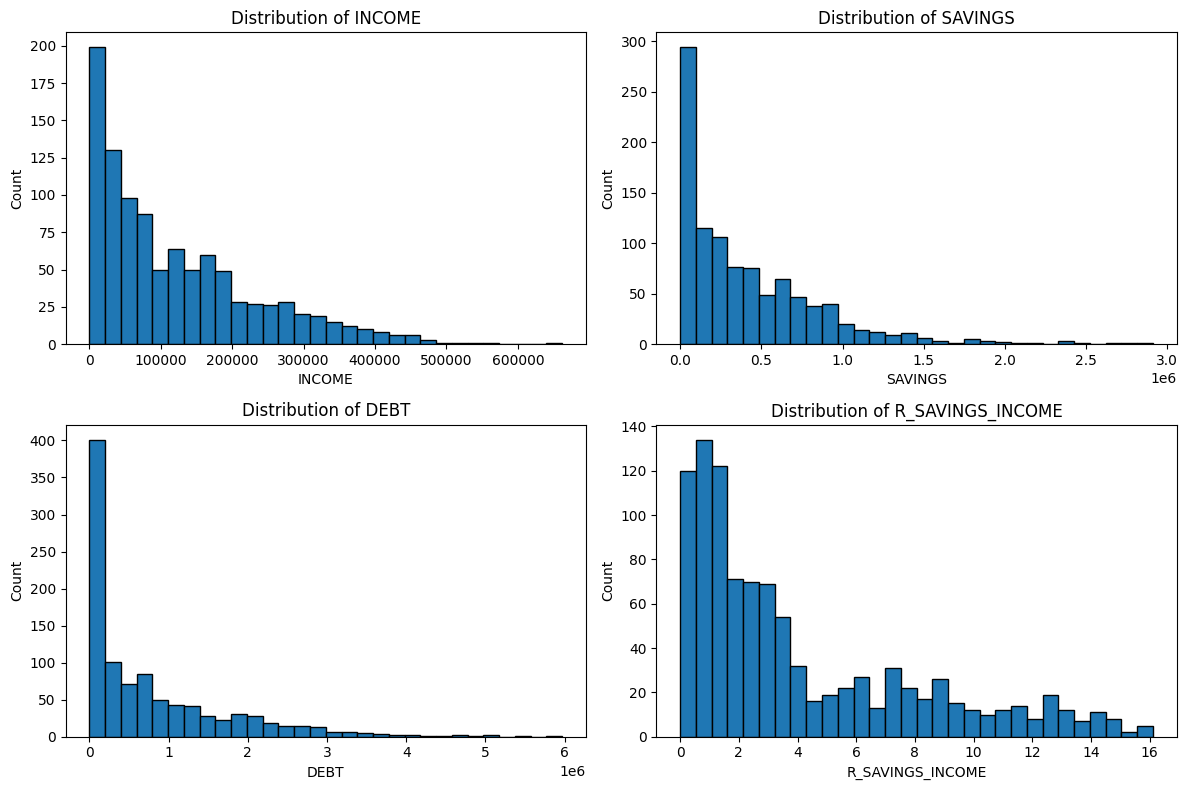

In [30]:
import matplotlib.pyplot as plt

features_to_plot = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features_to_plot, start=1):
    plt.subplot(2, 2, i)
    plt.hist(data_df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


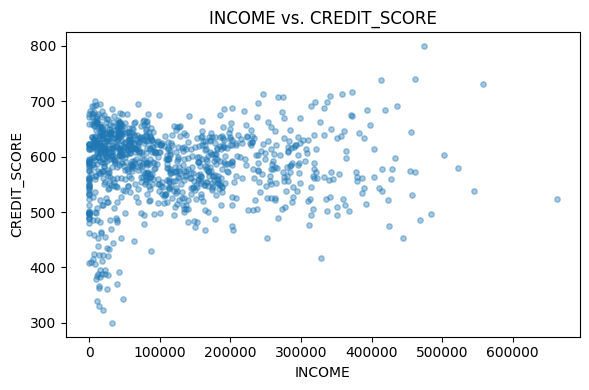

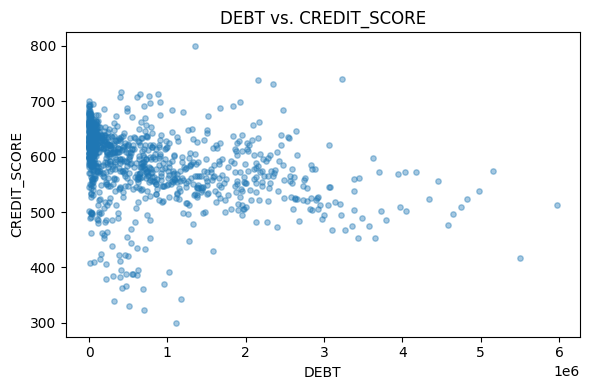

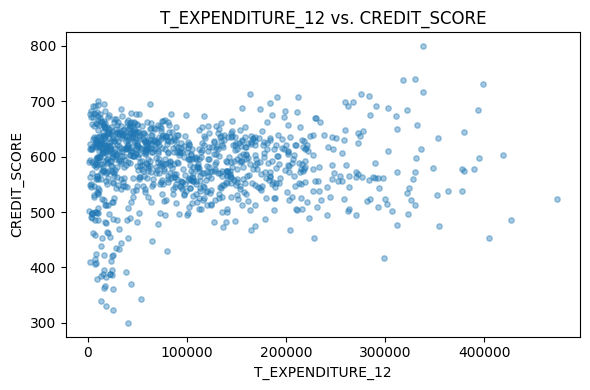

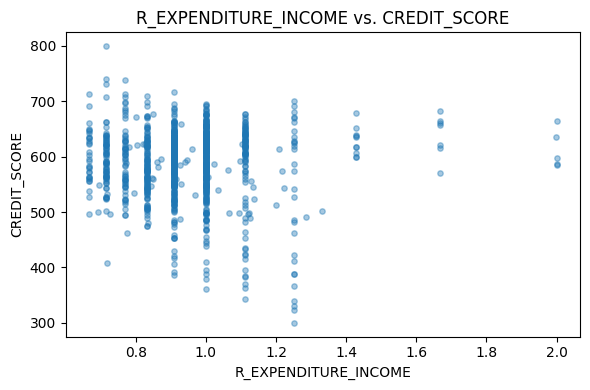

In [33]:
scatter_feats = ["INCOME", "DEBT", "T_EXPENDITURE_12", "R_EXPENDITURE_INCOME"]
for feat in scatter_feats:
    plt.figure(figsize=(6, 4))
    plt.scatter(data_df[feat].dropna(), data_df["CREDIT_SCORE"].dropna(), alpha=0.4, s=15)
    plt.title(f"{feat} vs. CREDIT_SCORE")
    plt.xlabel(feat)
    plt.ylabel("CREDIT_SCORE")
    plt.tight_layout()
    plt.show()